In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = '/Users/nikhilvalsankulangareth/Downloads/Mall_Customers.csv'
data = pd.read_csv(url)
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Data Preprocessing
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)




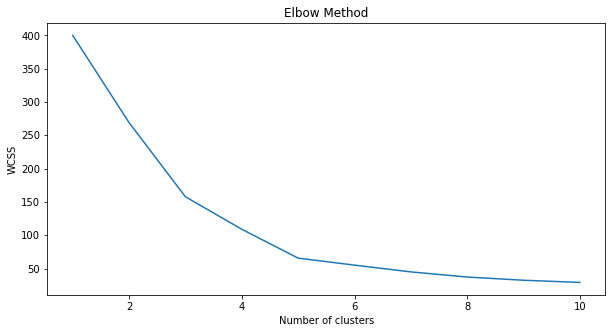

In [6]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



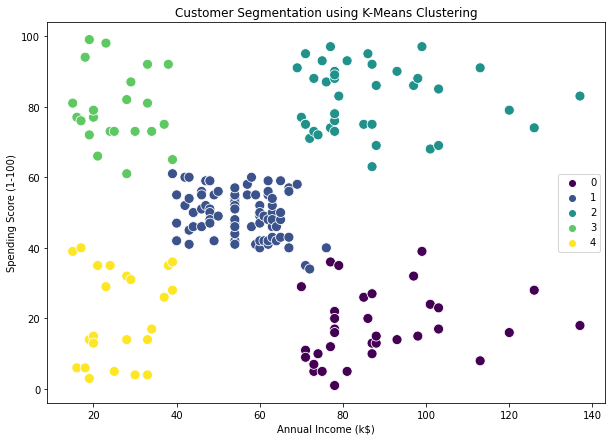

Cluster 0: Annual Income (k$): 88.20, Spending Score: 17.11
Cluster 1: Annual Income (k$): 55.30, Spending Score: 49.52
Cluster 2: Annual Income (k$): 86.54, Spending Score: 82.13
Cluster 3: Annual Income (k$): 25.73, Spending Score: 79.36
Cluster 4: Annual Income (k$): 26.30, Spending Score: 20.91


In [7]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Visualization of Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Interpretation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: Annual Income (k$): {center[0]:.2f}, Spending Score: {center[1]:.2f}")